# Introduction

<Notice this is 'Markdown'>
<This is also how you put in comments.>
This is how to enter normal text. You can even use LaTeX in here, just by using standard TeX formatting. For example,

\begin{equation}
f(x)=x^2 - 3x +2.
\end{equation}

It's terribly easy. You should use this for all text in your report.

You can get different Heading/Section styles by using different numbers of # marks (up to six).

# One 
## Two
### Three
#### Four
##### Five
###### Six
####### Seven - Oops! Not a thing!

If you want to enter Python code, switch to code -> 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
%matplotlib inline

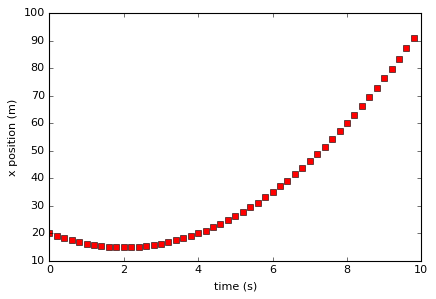

In [7]:
#create a time variable (Note in the code environment, # gives a comment!)
time=np.arange(0.,10.,0.2)#*u.s

#let's look at a basic kinematic equation, setting some initial conditions (and constant acceleration)
xi=+20.0#*u.m
vi=-5.0#*u.m/u.s
ac=+2.5#*u.m/u.s/u.s
xf=xi+vi*time+.5*ac*time**2.

#and make a plot - what does 'rs' do?
plt.plot(time, xf, 'rs')
plt.xlabel('time (s)')
plt.ylabel('x position (m)')
plt.show()

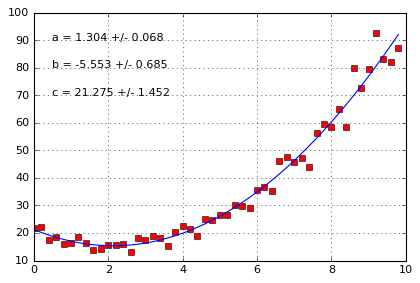

In [8]:
#define function
def func(x, a, b, c):
    return a*x**2 + b*x + c

#make noisy data
yn = xf + 0.1 * xf * np.random.normal(size=len(time))

popt, pcov = curve_fit(func, time, yn)

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(time,yn,'rs')
ax.plot(time, np.polyval(popt, time), '-')
ax.text(0.5, 90, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
ax.text(0.5, 80, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
ax.text(0.5, 70, r"c = {0:.3f} +/- {1:.3f}".format(popt[2], pcov[2,2]**0.5))
ax.grid()
plt.show()

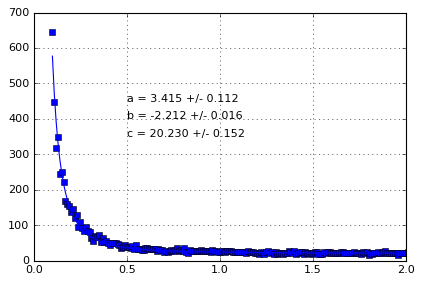

In [9]:
#define function
def func2(x,a,b,c):
    return a*x**b + c

ti2=np.arange(0.1,10.,0.01)
fx2=xi+5.*ti2**(-2.)

#make noisy data
yn2 = fx2 + 0.1 * fx2 * np.random.normal(size=len(ti2))

popt2, pcov2 = curve_fit(func2, ti2, yn2,bounds=([0.,-4.,10.],[10.,4.,30.]))

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(ti2,yn2,'bs')
ax.plot(ti2, func2(ti2, *popt2), '-')
ax.text(0.5, 450, r"a = {0:.3f} +/- {1:.3f}".format(popt2[0], pcov2[0,0]**0.5))
ax.text(0.5, 400, r"b = {0:.3f} +/- {1:.3f}".format(popt2[1], pcov2[1,1]**0.5))
ax.text(0.5, 350, r"c = {0:.3f} +/- {1:.3f}".format(popt2[2], pcov2[2,2]**0.5))
ax.grid()
plt.xlim(0.,2.)
plt.show()

In [56]:
from scipy.stats import expon
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

0.00142043210549 1.03345719558
[  9.99999998e-01   1.00000000e+00   1.70689753e-09]


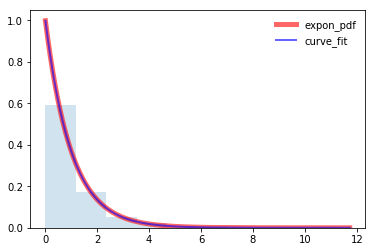

In [59]:
#create figure
fig, ax = plt.subplots(1, 1)

#create random data drawn from an exponential and sort
r = np.sort(expon.rvs(size=1000))

#create exponential fit to distribution (option 1)
a1, scale1 = expon.fit(r)
#create exponential fit using curve_fit (option 2)
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c
popt, pcov = curve_fit(exponenial_func, r, expon.pdf(r))#, p0=(1, 1e-6, 1))

#plot fits
ax.plot(r, expon.pdf(r),'r-', lw=5, alpha=0.6, label='expon_pdf')
ax.plot(r, exponenial_func(r, *popt), 'b-', lw=2, alpha=.6, label='curve_fit')

#add histogram to plot
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

#print fit parameters (option 1) - be sure you know what theses parameters correspond to!
print(a1, scale1)
#print fit parameters (option 2) - a, b, c are defined in your function
print(popt)


plt.show()

1506.22461279


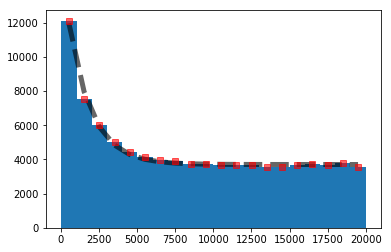

In [22]:
from astropy.io import ascii
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data=ascii.read('lab04/exp_data.csv')
delt=np.sort(data['delta_t'])

#loc1, scale1 = expon.fit(delt)
#print(loc1, scale1)



fig, ax = plt.subplots(1, 1)
(numbs, bins, patches) = ax.hist(delt, bins=20, label='hst')
lower = np.resize(bins, len(bins)-1)
tmid =  lower + 0.5*np.diff(bins)

#print(tmid,numbs)

#plot fits
#ax.plot(delt, np.exp(-delt)+scale,'r-', lw=5, alpha=0.6, label='expon_pdf')
#add histogram to plot
#ax.hist(delt, histtype='stepfilled', alpha=0.2)

def exponential_func(x, a, b, c):
    return a*np.exp(-x*b)+c
#popt, pcov = curve_fit(exponenial_func, delt, expon.pdf(delt,loc=0,scale=scale1))
popt, pcov = curve_fit(exponential_func, tmid, numbs,bounds=([1000.,0.0006,3000.],[20000,.0007,4000.]))

#plot fits
ax.plot(tmid, exponential_func(tmid, *popt),'k--', lw=5, alpha=0.6, label='expon_pdf')
ax.plot(tmid, numbs, 'rs', lw=2, alpha=.6, label='curve_fit')

#add histogram to plot
#ax.hist(delt, normed=True, histtype='stepfilled', alpha=0.2)
#print(popt)
mean_life=1./popt[1]
print(mean_life)#in nanosec.
plt.show()

In [31]:
expon.pdf?